# Cycle Duration Histogram

Visualize the distribution of gastric cycle durations using
`plot_cycle_histogram`. The normogastric range (default 15–30 s) is
marked with dashed lines, and the percentage of normogastric cycles
is shown in the title.

In [1]:
import matplotlib.pyplot as plt
import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# Load and process
egg = gp.load_egg()
best_idx, _, _, _ = gp.select_best_channel(egg["signal"], egg["sfreq"])
_, info = gp.egg_process(egg["signal"][best_idx], egg["sfreq"])
durations = info["cycle_durations_s"]
print(f"{len(durations)} cycles detected")

37 cycles detected


## Default Normogastric Range (15–30 s)

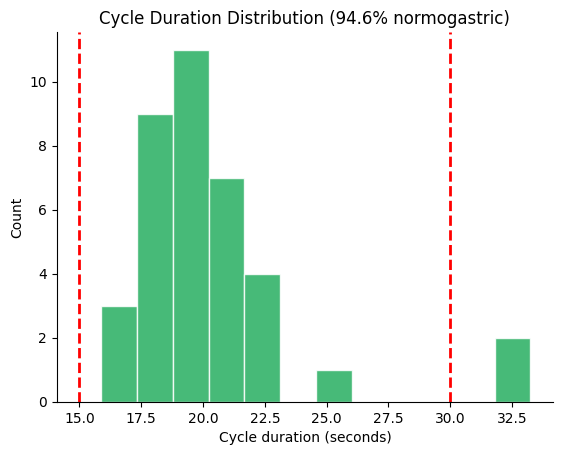

In [3]:
fig, ax = gp.plot_cycle_histogram(durations)
plt.show()

## Custom Normogastric Range

Some studies use a narrower range (e.g., 17–25 s for ~2.4–3.5 cpm).
Pass `normo_range` to adjust the boundary lines and percentage.

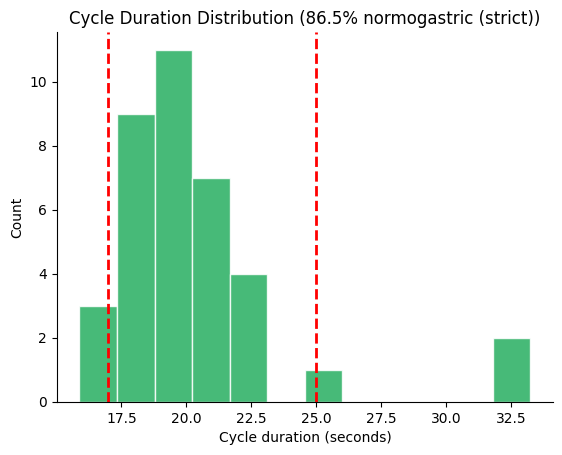

In [4]:
fig, ax = gp.plot_cycle_histogram(durations, normo_range=(17.0, 25.0))
ax.set_title(ax.get_title().replace("normogastric", "normogastric (strict)"))
plt.show()

## Side-by-Side Comparison

Pass an `ax` to embed the histogram in a custom figure layout.

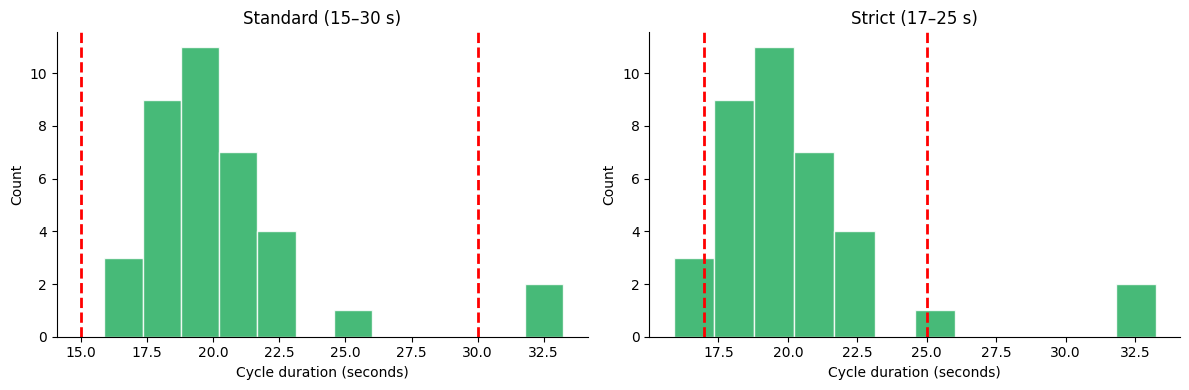

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
gp.plot_cycle_histogram(durations, normo_range=(15.0, 30.0), ax=ax1)
ax1.set_title("Standard (15–30 s)")
gp.plot_cycle_histogram(durations, normo_range=(17.0, 25.0), ax=ax2)
ax2.set_title("Strict (17–25 s)")
fig.tight_layout()
plt.show()

**See also:** [Quality Assessment](quality_assessment.ipynb),
[EGG Processing Tutorial](../tutorials/egg_processing.ipynb)